# Exploring and Cleaning


# Wine data set: Exploring and Cleaning
A detailed implementation of Decision Tree Classification, Random Forest and Gradient Boosting models using the wine data set from the UCI Machine learning website.

http://archive.ics.uci.edu/ml/datasets/Wine


#### Data Set Information:

The variables used in the models are listed below:
    - type
    - Alcohol
    - Malic_acid
    - Ash
    - Alcalinity
    - Magnesium
    - Total_phenols
    - Flavanoids
    - Nonflavanoid_phenols
    - Proanthocyanins
    - Color_intensity
    - Hue
    - OD280/OD315
    - Proline
    


## Section 1: Data Exploration


In [1]:
# Import libraries necessary for this project

from time import time
from IPython.display import display # Allows the use of display() for displaying DataFrames

import matplotlib.pyplot as plt
import seaborn as sns


# Pretty display for notebooks
%matplotlib inline




import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import row
from bokeh.io import output_notebook
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import sklearn
import sklearn.metrics
from sklearn import ensemble
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')
output_notebook()
%matplotlib inline

Loading BokehJS ...

### Load and explore

In [2]:
data = pd.read_csv("wine.data.txt", sep=',')
data.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [3]:
cols =['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash','Magnesium', \
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'] 

In [4]:
# Load the Red Wines dataset
df = pd.read_csv("wine.data.txt", sep=',', \
                   names=['type','Alcohol', 'Malic_acid', 'Ash', 'Alcalinity',\
                            'Magnesium', 'Total_phenols', 'Flavanoids', \
                            'Nonflavanoid_phenols', 'Proanthocyanins', \
                            'Color_intensity', 'Hue', 'OD280/OD315', \
                            'Proline' ])
# Display the first five records

df.head()


,type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.dtypes


type                      int64
Alcohol                 float64
Malic_acid              float64
Ash                     float64
Alcalinity              float64
Magnesium                 int64
Total_phenols           float64
Flavanoids              float64
Nonflavanoid_phenols    float64
Proanthocyanins         float64
Color_intensity         float64
Hue                     float64
OD280/OD315             float64
Proline                   int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
type                    178 non-null int64
Alcohol                 178 non-null float64
Malic_acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity              178 non-null float64
Magnesium               178 non-null int64
Total_phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_intensity         178 non-null float64
Hue                     178 non-null float64
OD280/OD315             178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [7]:
# int to float
# does it matter ??? ???   ??????

df.Magnesium = df.Magnesium.apply(np.float)
df.Proline = df.Proline.apply(np.float)


In [8]:
df.type.value_counts().sort_index()

1    59
2    71
3    48
Name: type, dtype: int64

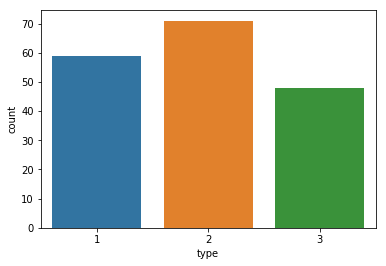

In [9]:
sns.countplot(x='type', data=df)

## Now, let's do some basic preliminary analysis of our data:

### Check for Nans

In [10]:
# count total nans
df.isnull().values.sum()      

0

### Descriptic Statistics:

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
type,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [12]:
# Value count of wine 'type'
df.type.value_counts()

2    71
1    59
3    48
Name: type, dtype: int64

In [13]:
# When we group by type we begin to see differences
print(df.groupby('type').mean())

        Alcohol  Malic_acid       Ash  Alcalinity   Magnesium  Total_phenols  \
type                                                                           
1     13.744746    2.010678  2.455593   17.037288  106.338983       2.840169   
2     12.278732    1.932676  2.244789   20.238028   94.549296       2.258873   
3     13.153750    3.333750  2.437083   21.416667   99.312500       1.678750   

      Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity  \
type                                                                       
1       2.982373              0.290000         1.899322         5.528305   
2       2.080845              0.363662         1.630282         3.086620   
3       0.781458              0.447500         1.153542         7.396250   

           Hue  OD280/OD315      Proline  
type                                      
1     1.062034     3.157797  1115.711864  
2     1.056282     2.785352   519.507042  
3     0.682708     1.683542   629.895833  


## Examine some features that seem to vary significantly by wine 'type'

### Proline

In [14]:
# Proline varies by type dramatically
df.groupby('type')['Proline'].describe()


,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
1,59.0,1115.711864,221.520767,680.0,987.5,1095.0,1280.0,1680.0
2,71.0,519.507042,157.211220,278.0,406.5,495.0,625.0,985.0
3,48.0,629.895833,115.097043,415.0,545.0,627.5,695.0,880.0


[Text(0, 0.5, 'Proline'),
 Text(0.5, 0, 'Type'),
 Text(0.5, 1.0, 'Proline by Wine Type')]

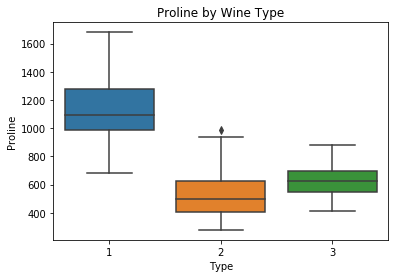

In [15]:
bx = sns.boxplot(x="type", y='Proline', data = df)
bx.set(xlabel='Type', ylabel='Proline', title='Proline by Wine Type')

### Alcohol

In [16]:
df.groupby('type')['Alcohol'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
1,59.0,13.744746,0.462125,12.85,13.400,13.750,14.100,14.83
2,71.0,12.278732,0.537964,11.03,11.915,12.290,12.515,13.86
3,48.0,13.153750,0.530241,12.20,12.805,13.165,13.505,14.34


[Text(0, 0.5, 'Alcohol'),
 Text(0.5, 0, 'Type'),
 Text(0.5, 1.0, 'Alcohol by Wine Type')]

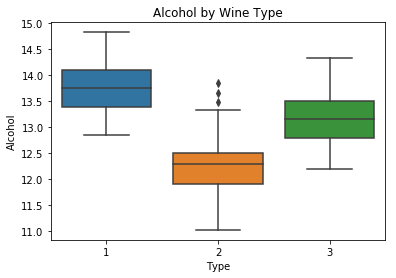

In [17]:
bx = sns.boxplot(x="type", y='Alcohol', data = df)
bx.set(xlabel='Type', ylabel='Alcohol', title='Alcohol by Wine Type')

### Color Intensity

[Text(0, 0.5, 'Color Intensity'),
 Text(0.5, 0, 'Type'),
 Text(0.5, 1.0, 'Color Intensity by Wine Type')]

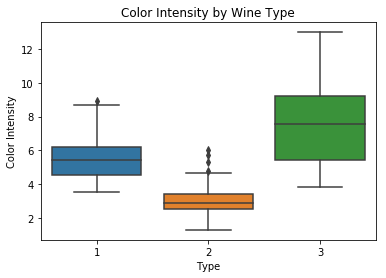

In [18]:
bx = sns.boxplot(x="type", y='Color_intensity', data = df)
bx.set(xlabel='Type', ylabel='Color Intensity', title='Color Intensity by Wine Type')

## Section 2: Exploring Relationships between features

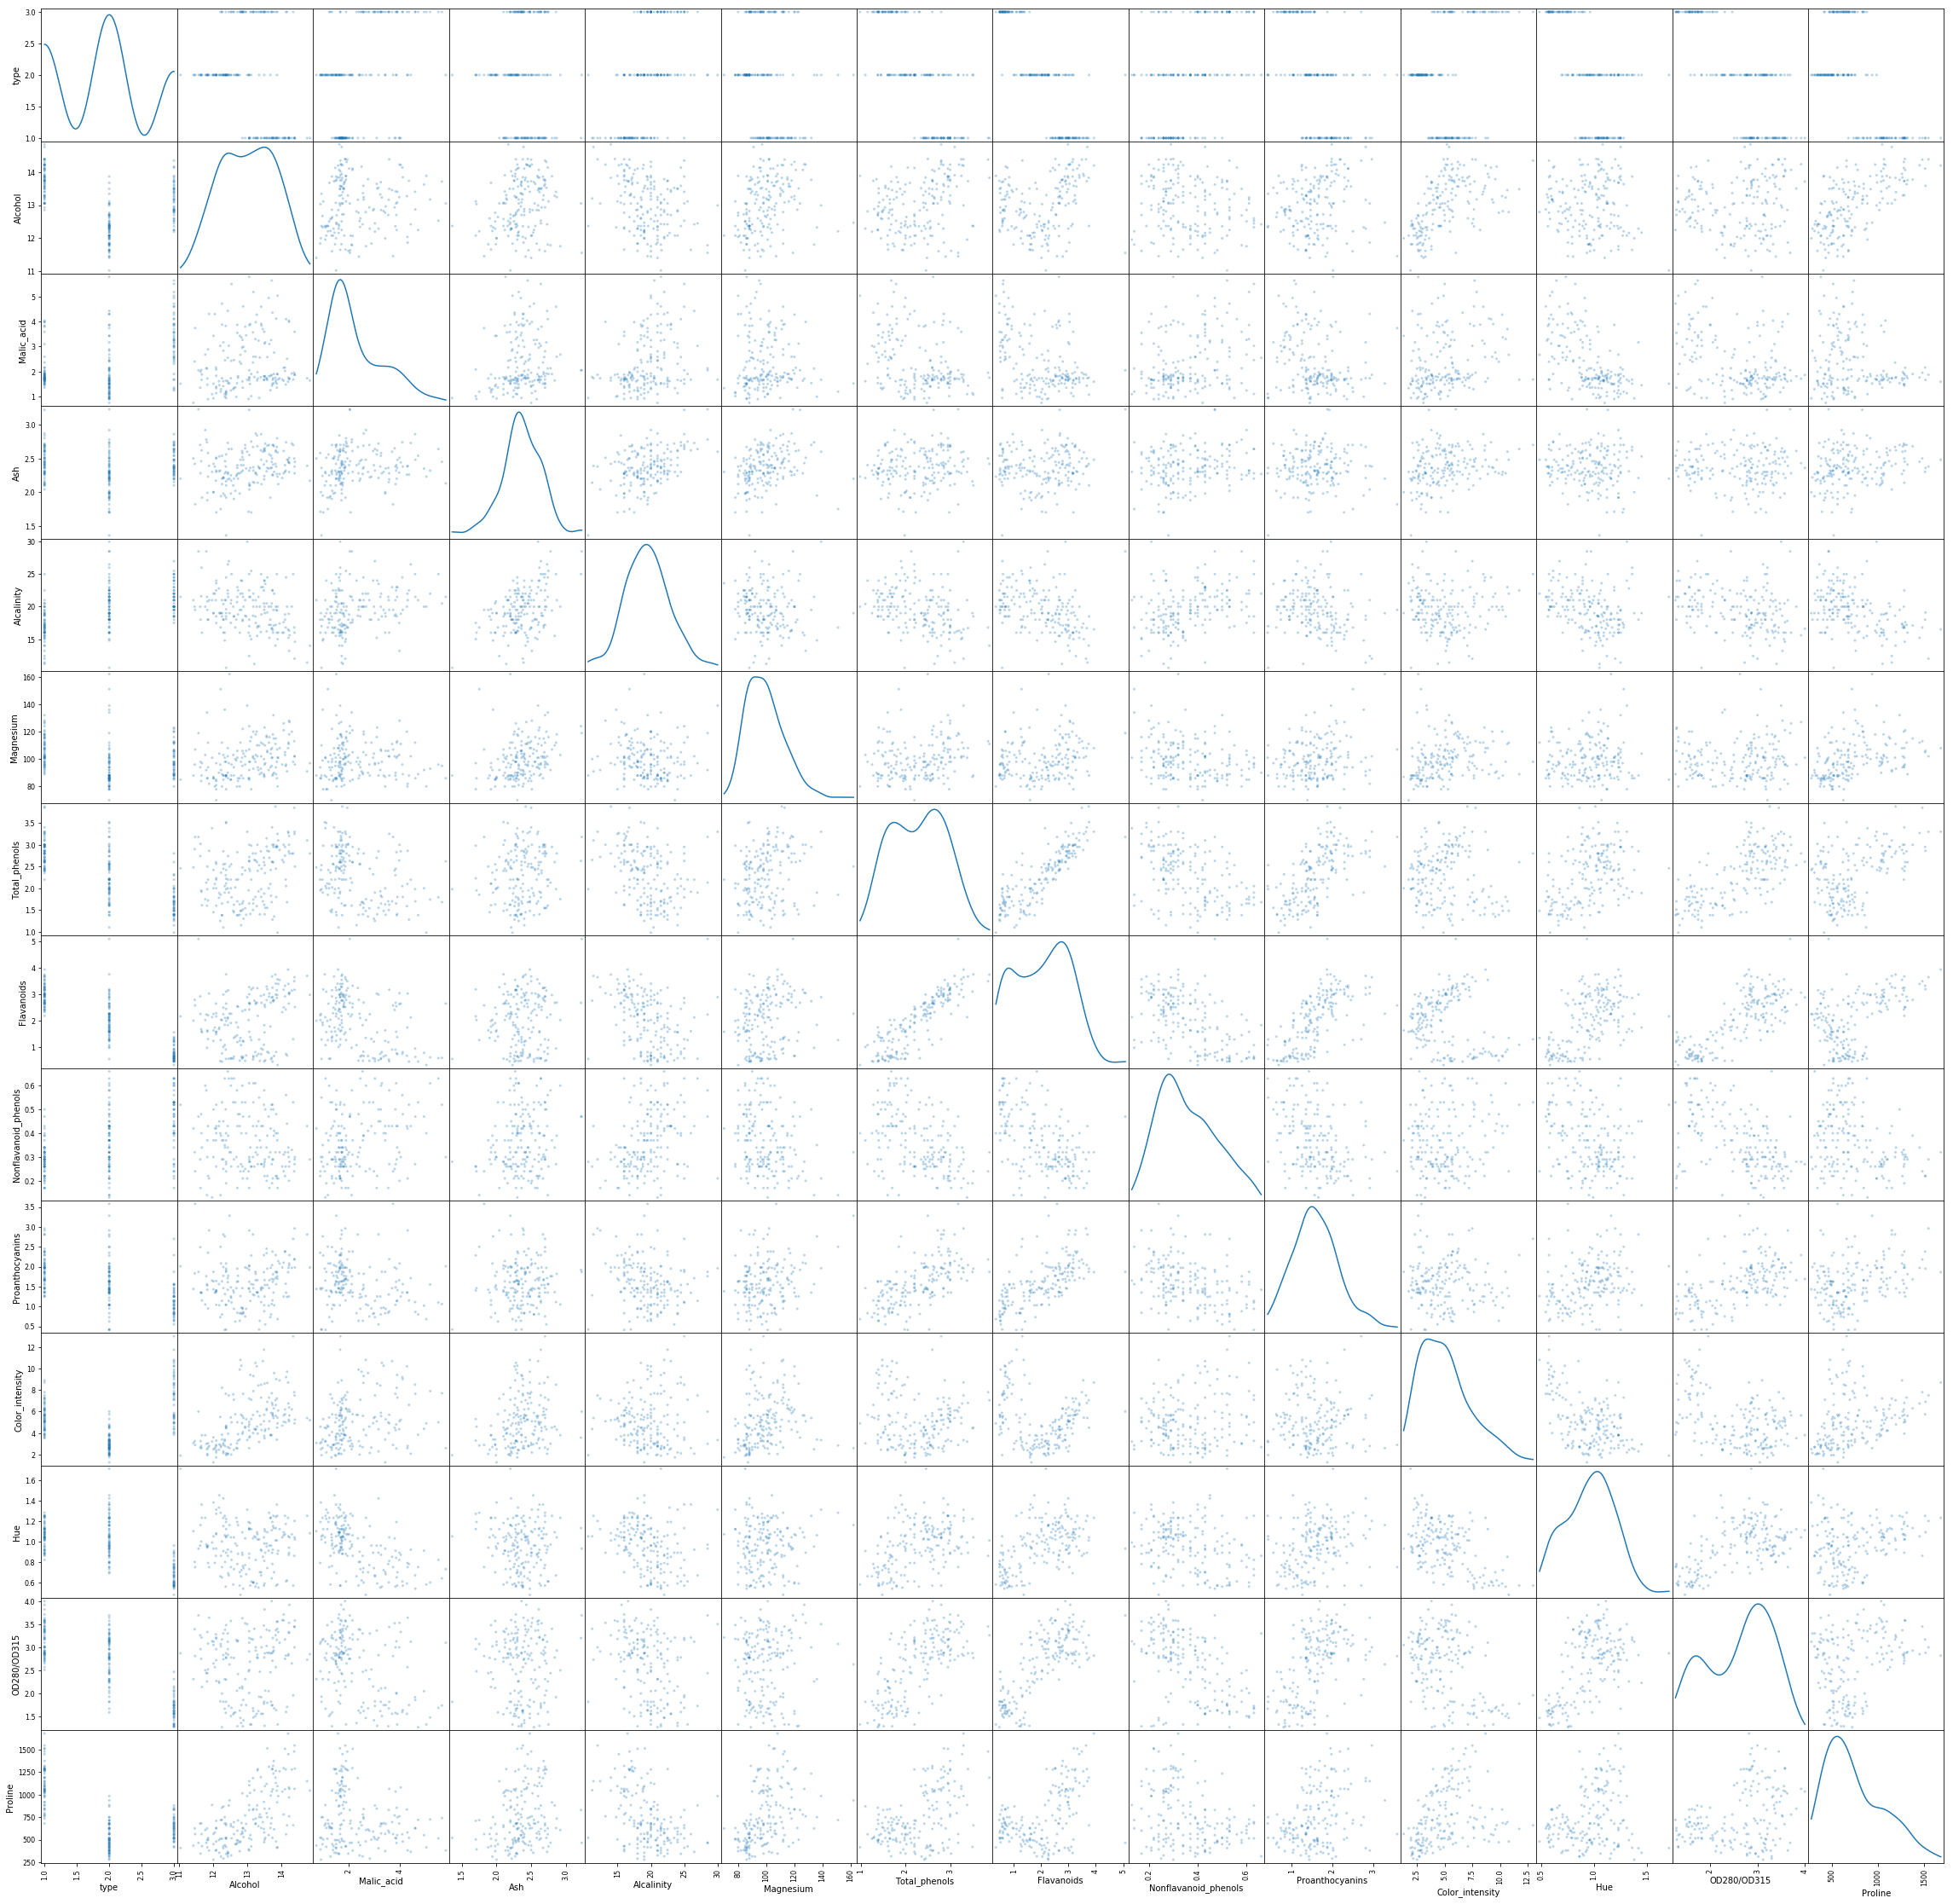

In [19]:
# Scatter Plot
pd.plotting.scatter_matrix(df, alpha = 0.3, figsize = (40,40), diagonal = 'kde');

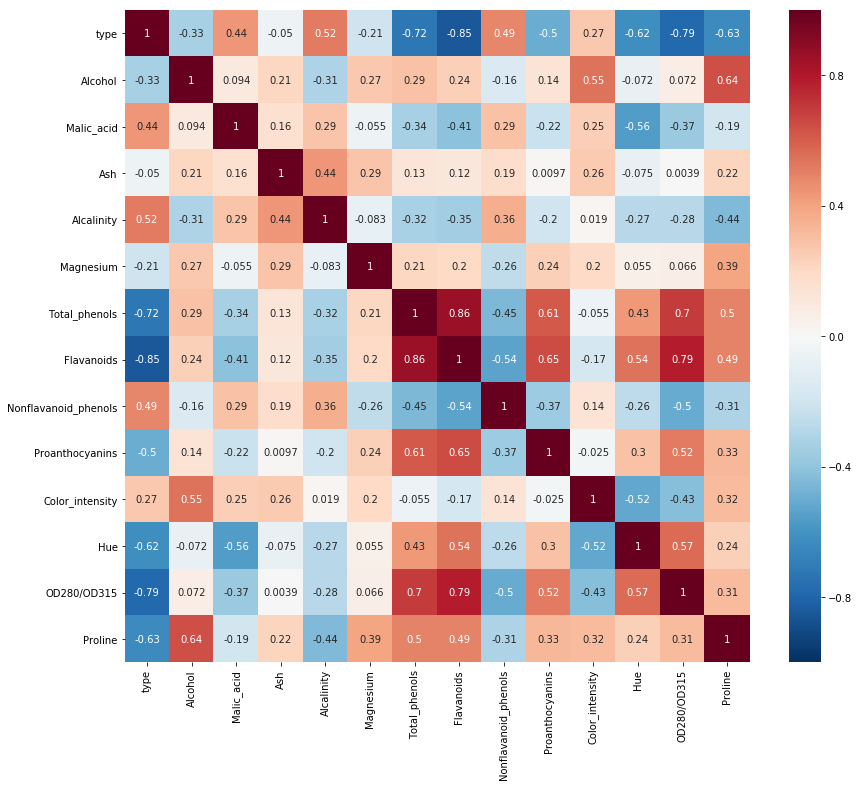

In [20]:
# Heatmap between features
correlation = df.corr()
#display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

# Visualize the co-relation between Alcohol and Proline

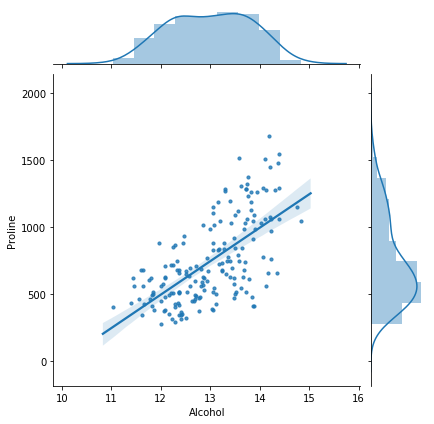

In [21]:
#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
alcohol_proline = df[['Alcohol', 'Proline']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="Alcohol", y="Proline", data=df, size=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)


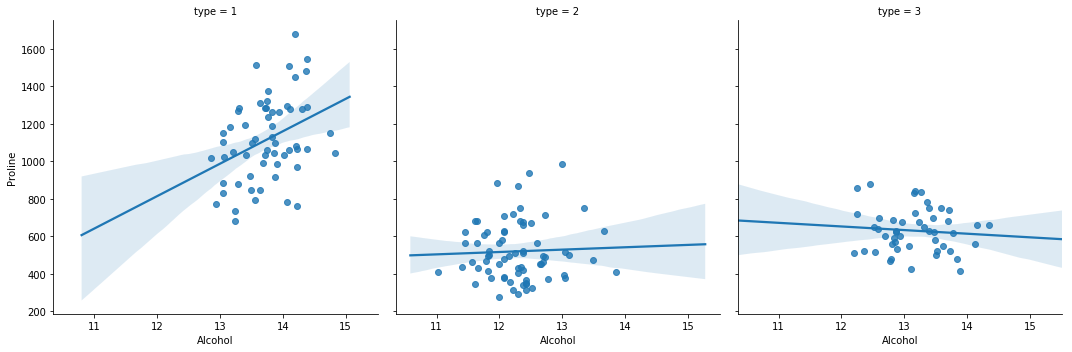

In [22]:
# Differences appear when examined by type
sns.lmplot(x = "Alcohol", y = "Proline", col = "type", data = df)

# Visualize a plot between Flavanoids and Total_phenols

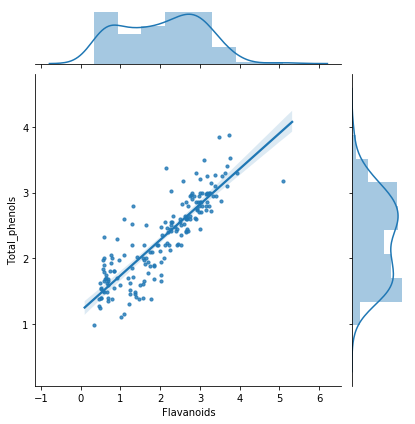

In [23]:
# Visualize density vs fixed acidity
flavanoids_total_phenols = df[['Flavanoids', 'Total_phenols']]
gridB = sns.JointGrid(x="Flavanoids", y="Total_phenols", data= flavanoids_total_phenols
                      , size=6)
gridB = gridB.plot_joint(sns.regplot, scatter_kws={"s": 10})
gridB = gridB.plot_marginals(sns.distplot)

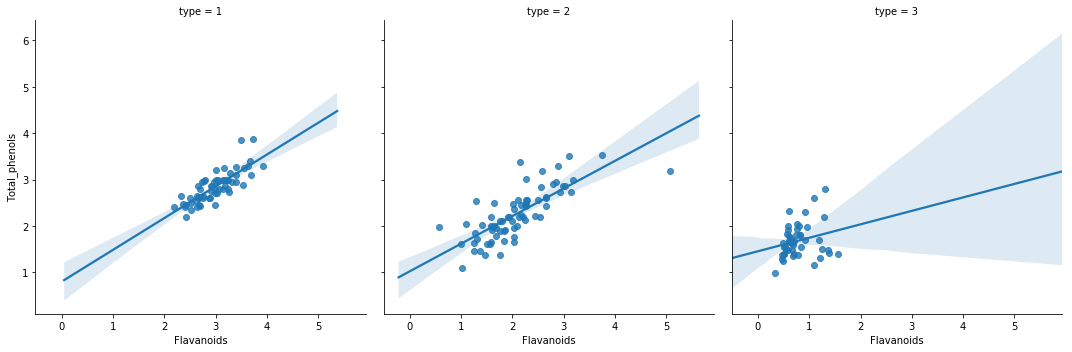

In [24]:
sns.lmplot(x = "Flavanoids", y = "Total_phenols", col = "type", data = df)

## Visualize nonflavanoid_phenols vs OD280/OD315



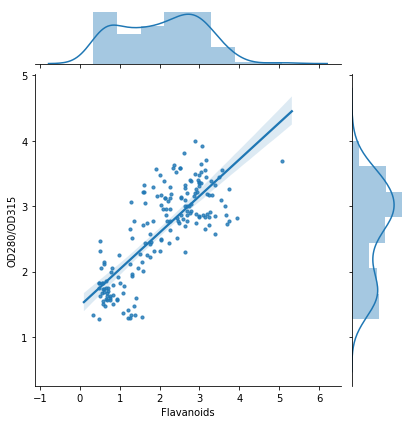

In [25]:
# Create plot
nonflavanoid_phenols_OD280OD315 = df[['Flavanoids', 'OD280/OD315']]
g = sns.JointGrid(x="Flavanoids", y="OD280/OD315", data=nonflavanoid_phenols_OD280OD315, size=6)
g = g.plot_joint(sns.regplot, scatter_kws={"s": 10})
g = g.plot_marginals(sns.distplot)

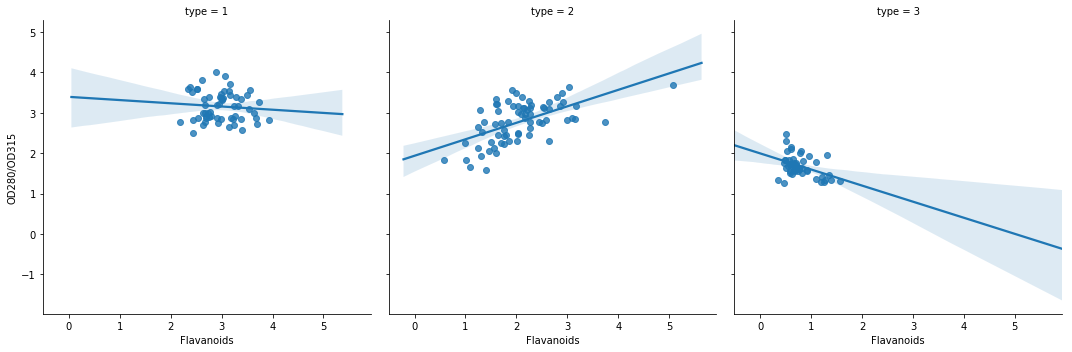

In [26]:
sns.lmplot(x = 'Flavanoids', y = "OD280/OD315", col = "type", data = df)

## Tukey Method for Outlier Detection

In [27]:
df.keys()

Index(['type', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280/OD315', 'Proline'],
      dtype='object')

In [28]:
# For each feature find the data points with extreme high or low values
for feature in df.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(df[feature], q=25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(df[feature], q=75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    interquartile_range = Q3 - Q1
    step = 1.5 * interquartile_range
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))])
    


Data points considered outliers for the feature 'type':


,type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline


Data points considered outliers for the feature 'Alcohol':


,type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline


Data points considered outliers for the feature 'Malic_acid':


,type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
123,2,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.6,0.73,3.10,380.0
137,3,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.0,0.82,1.69,515.0
173,3,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0


Data points considered outliers for the feature 'Ash':


,type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
25,1,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0
59,2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0
121,2,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0


Data points considered outliers for the feature 'Alcalinity':


,type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
59,2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0
73,2,12.99,1.67,2.60,30.0,139.0,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0
121,2,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0
127,2,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0


Data points considered outliers for the feature 'Magnesium':


,type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
69,2,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0
73,2,12.99,1.67,2.60,30.0,139.0,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0
78,2,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0
95,2,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0


Data points considered outliers for the feature 'Total_phenols':


,type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline


Data points considered outliers for the feature 'Flavanoids':


,type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline


Data points considered outliers for the feature 'Nonflavanoid_phenols':


,type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline


Data points considered outliers for the feature 'Proanthocyanins':


,type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
95,2,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.6,1.16,2.63,937.0
110,2,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.9,0.75,2.81,562.0


Data points considered outliers for the feature 'Color_intensity':


,type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
151,3,12.79,2.67,2.48,22.0,112.0,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480.0
158,3,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0
159,3,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0
166,3,13.45,3.70,2.60,23.0,111.0,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695.0


Data points considered outliers for the feature 'Hue':


,type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
115,2,11.03,1.51,2.2,21.5,85.0,2.46,2.17,0.52,2.01,1.9,1.71,2.87,407.0


Data points considered outliers for the feature 'OD280/OD315':


,type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline


Data points considered outliers for the feature 'Proline':


,type,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline


In [29]:
# Outliers to remove, some rows are listed twice

outliers= [123, 137, 173, 25, 59, 121, 59, 73, 121, 127, 69, 73, 78, 95, 95, 110, 151, 158, 159, 166, 115]
outliers.sort()
len(outliers)


21

In [30]:
# Remove duplicate elements 
def Remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list

outliers = Remove(outliers)
len(outliers)

17

In [31]:
# Select the indices for data points you wish to remove

# Remove the outliers
good_data = df.drop(df.index[outliers]).reset_index(drop = True)
             
good_data.shape

(161, 14)

In [32]:
# Reassigne dataframe with outliers removed
df = good_data
df.shape

(161, 14)

In [33]:
# The data types are more even now that some instances have been removed, but
# still slightly imbalanced
df.type.value_counts()

2    61
1    58
3    42
Name: type, dtype: int64

# Conclusion

The goal of this ipynb was to explore and clean the dataset:

- The data was loaded from a .txt file.


- Column names were ascribed.


- No null values were found.


- Descriptive statistics were run to familiarize oneself with the data and identify any discpreancies.


- Boxplots were created as a visual check for outliers.


- Tukey's Method of Oultier Detection was used to identify 21 outliers in the data. As a result 17 rows were removed (some rows had 2 outliers).


- A correlation matrix was created to understand the relationship between features. It was found that there is a high correlation between Flavanoids and Total_phenols 


- Wine was grouped and evaluated by type and it became apparent that some of the values differ strongly by type: Proline, Alcohol, and Color_intensity 




***The data set is ready to be used for predictive modeling. In the next section, 3 models are evaluated to determine which model best classifies the wine by type (decision trees, random forests, and gradient boosting).***